In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
from skimage.io import imread
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier as RF
import glob
import os
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold as KFold
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from matplotlib import colors
from pylab import cm
from skimage import segmentation
from skimage.morphology import watershed
from skimage import measure
from skimage import morphology
import numpy as np
import pandas as pd
from scipy import ndimage
from skimage.feature import peak_local_max
# make graphics inline
%matplotlib inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
seed = 128
rng = np.random.RandomState(seed)

root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'DqSAAS/ImageDataSet')
sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

False

In [3]:
ImageTrain = pd.read_csv(os.path.join(data_dir,'Image','TrainImage','TrainImage.csv'),encoding='ISO-8859-1')
ImageTest = pd.read_csv(os.path.join(data_dir,'Image','TestImage','TestImage.csv'),encoding='ISO-8859-1')

In [13]:
ImageTrain

,_unit_id,Image
0,4,Boy.jpg
1,5,Couple.jpeg
2,2,Man.jpeg
3,7,Girl.jpg
4,6,Unknown.png
5,3,singh.jpg
6,1,Felix.jpg
7,6,Adam.png
8,10,Live.JPEG
9,8,JO.JPEG


In [5]:
img_name = rng.choice(ImageTrain.Image)

In [6]:
filepath = os.path.join(data_dir,'Image','TrainImage',img_name)

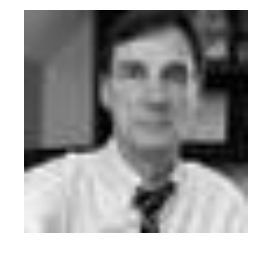

In [7]:
img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [119]:
img.shape

(48, 48)

In [9]:
temp = []
for img_name in ImageTrain.Image:
    image_path = os.path.join(data_dir, 'Image','TrainImage',img_name)
    img = imread(image_path, as_grey=True,flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 2304).astype('float32')

temp = []
for img_name in ImageTest.Image:
    image_path = os.path.join(data_dir,'Image','TestImage', img_name)
    img = imread(image_path,as_grey=True, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 2304).astype('float32')

In [10]:
train_y = keras.utils.np_utils.to_categorical(ImageTrain._unit_id.values)

In [14]:
train_y.shape

(11, 11)

In [19]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [45]:
input_num_units = 2304
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 11

epochs = 50
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

NameError: name 'Dropout' is not defined

In [16]:
ImageTest

,_unit_id,Image
0,4,Boy.jpg
1,5,Couple.jpeg
2,2,Man.jpeg
3,7,Girl.jpg
4,6,Unknown.png
5,3,singh.jpg
6,1,Felix.jpg
7,6,Adam.png
8,10,Live.JPEG
9,8,JO.JPEG


In [41]:
train_y

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 7 samples, validate on 4 samples
Epoch 1/5
7/7 [==============================] - 0s - loss: 2.3991 - acc: 0.0000e+00 - val_loss: 2.3990 - val_acc: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 0s - loss: 2.3968 - acc: 0.1429 - val_loss: 2.4006 - val_acc: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 0s - loss: 2.3950 - acc: 0.1429 - val_loss: 2.4020 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 0s - loss: 2.3931 - acc: 0.1429 - val_loss: 2.4039 - val_acc: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 0s - loss: 2.3910 - acc: 0.1429 - val_loss: 2.4057 - val_acc: 0.0000e+00


11/11 [==============================] - 0s
Prediction is:  4


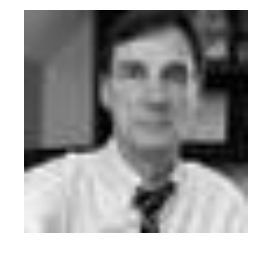

In [43]:
pred = model.predict_classes(test_x)

img_name = rng.choice(ImageTest.Image)
filepath = os.path.join(data_dir, 'Image','TestImage', img_name)

img = imread(filepath, flatten=True)

test_index = img_name.find('.')

print ("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()


In [42]:
test_y =keras.utils.np_utils.to_categorical(ImageTest._unit_id.values)

In [36]:
img_name.index('.')

5

In [44]:
pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)